## Analítica Predictiva

### Profesor: Eduardo Moreno
### Ayudante: Anthony Cho

__Fecha__: 2022.06.07

__Fecha de entrega__: miércoles 9 Junio, 2022 - 23:59 horas

In [1]:
import pandas as pd
import numpy as np
from plotnine import *


# Actividad: Regresión lineal y no-lineal

El presente trabajo puede ser realizado en grupos de hasta 3 personas. El __plazo de entrega__ es el __miércoles 9 Junio a la medianoche__ via webcursos, subiendo este notebook completado con sus respuestas.


## Integrantes del grupo
- <agregue acá lso integrantes del grupo con su RUT>
-
-


## Data
El siguiente set de datos representa distintos experimentos para estudiar la composición del concreto y su efecto en la fuerza de compresión.  El dataset siguiente incluye 1030 observaciones de concretos, incluyendo la composición de este, medido en la cantidad de cada elemento por metro cúbico de mezcla.
- Cement [kg/m3]
- Fly Ash [kg/m3]
- Blast Furnace [kg/m3]
- Water [kg/m3]
- Superplasticizer [kg/m3]
- Coarse aggregate [kg/m3]
- Fine aggregate [kg/m3]

y además se incluye la edad (*age*) de la muestra al momento de hacer el experimento.
- Age [days]

El *output* (valor a predecir) es su fuerza compresiva
- Compressive Strength [MPa]



Veamos los datos y grafiquémos la relación de cada *input* con el *output*

In [2]:
## Carga de datos
tmp = pd.read_excel('Concrete_Data.xls')
tmp.columns = ['Cement','Blast','FlyAsh','Water', 'Superplasticizer','CoarseAggregate','FineAggregate','Age','CompressiveStrength']

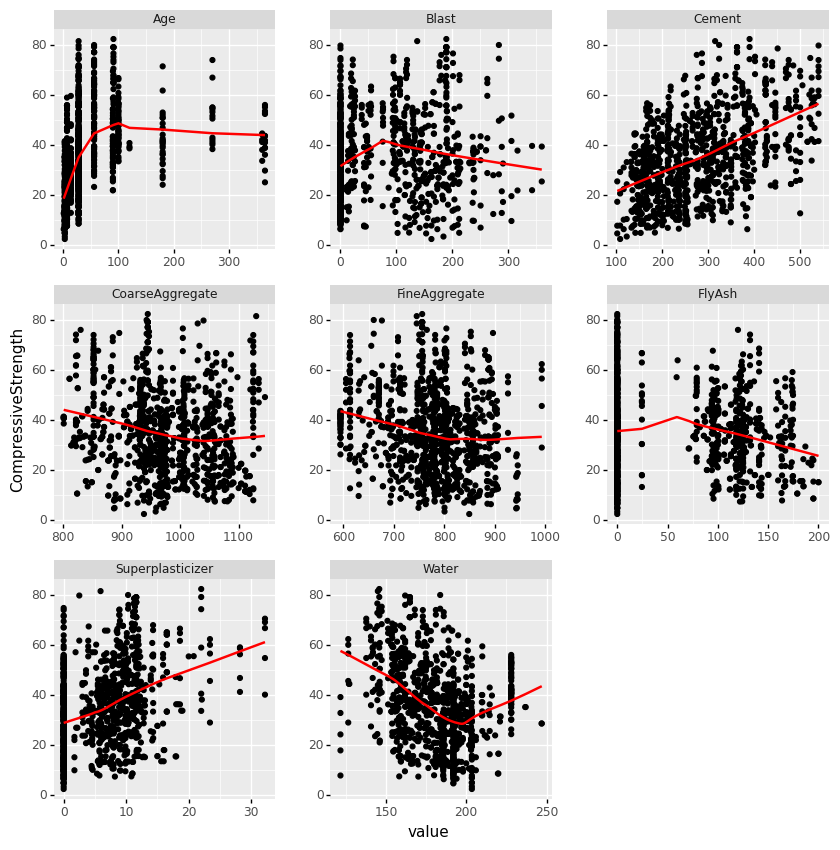

<ggplot: (-9223371890048108572)>

In [3]:
## Visualizacion de cada feature vs output (Compressive Strength)
ggplot(tmp.melt(id_vars='CompressiveStrength'), aes(x='value', y='CompressiveStrength')) \
+ geom_point() + geom_smooth(color='red', method='lowess', se=False)\
+ facet_wrap('variable', scales='free') \
+ theme(figure_size=(10,10), subplots_adjust={'wspace': 0.25, 'hspace': 0.25})

In [4]:
tmp.iloc[:,:-1].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\ccbce\Documents\MIIO\Analisis_predictivo\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Cement,Blast,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
Cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08
Blast,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04
FlyAsh,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15
Water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28
Superplasticizer,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19
CoarseAggregate,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00
FineAggregate,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16
Age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00


Separemos la variable a predecir (`dataY`) de las variables de entrada. Para esto, construiremos dos conjuntos de input. Uno con las cantidades originales (`dataOrigX`) y otro que contiene el porcentaje de cada elemento en la mezcla (`dataNormX`).  

In [5]:
## Datos (Output)
dataY = tmp['CompressiveStrength']

## Datos originales (features)
dataOrigX = tmp.iloc[:,:8].copy()

print('(Shape) X: {}, Y: {}'.format(dataOrigX.shape, dataY.shape))

(Shape) X: (1030, 8), Y: (1030,)


In [6]:
## Datos en terminos de porcentaje de mezclas (features)
kgTotal = tmp.iloc[:,:7].sum(axis=1)
for i in range(7):
    tmp.iloc[:,i] = tmp.iloc[:,i]/kgTotal
dataNormX = tmp.iloc[:,:-1].copy()

print('(Shape) X: {}, Y: {}'.format(dataNormX.shape, dataY.shape))

(Shape) X: (1030, 8), Y: (1030,)


In [8]:
dataNormX

,Cement,Blast,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,0.223094,0.000000,0.000000,0.066928,0.001033,0.429663,0.279281,28
1,0.221720,0.000000,0.000000,0.066516,0.001026,0.433176,0.277561,28
2,0.149170,0.063930,0.000000,0.102288,0.000000,0.418125,0.266487,270
3,0.149170,0.063930,0.000000,0.102288,0.000000,0.418125,0.266487,365
4,0.085350,0.056900,0.000000,0.082513,0.000000,0.420474,0.354764,360
...,...,...,...,...,...,...,...,...
1025,0.119674,0.050225,0.039098,0.077762,0.003853,0.376732,0.332655,28
1026,0.141595,0.000000,0.050802,0.086135,0.004570,0.359437,0.357460,28
1027,0.065485,0.061472,0.047890,0.084976,0.002690,0.393526,0.343961,28
1028,0.068839,0.080781,0.000000,0.075978,0.004889,0.428176,0.341338,28


## Objetivo
El objetivo del trabajo es obtener el mejor modelo predictivo que explique el output (`dataY`) a partir del input (`dataOrigX` o `dataNormX`, el que usted prefiera), para así encontrar una mejor mezcla de cemento.  Para esto, separamos el trabajos en cuatro partes.

### Parte 1:  Preprocesamiento de datos
Pruebe y decida que datos va a utilizar. Es decir, si utilizará `dataOrigX` o `dataNormX`, así como cualquier transformación que va a aplicar a estos datos (eliminación de columnas, sesgo, correlación, etc). 

En el siguiente cuadro, describa estas decisiones incluyendo la justificación de por qué hizo esto.  A continuación, ponga los códigos utilizados para esto.  (Ojo, no necesita poner cada experimento utilizado, basta el que le dio mejores resultados)

#### Respuesta:
< escriba aca las decisiones y el por qué de ellas >

In [40]:
# Escriba aca los códigos utilizados. Agregue celdas si necesita.

In [7]:
dataOrigX.skew()

Cement              0.509517
Blast               0.800737
FlyAsh              0.537445
Water               0.074324
Superplasticizer    0.908113
CoarseAggregate    -0.040206
FineAggregate      -0.252979
Age                 3.269177
dtype: float64

In [8]:
from sklearn.preprocessing import PowerTransformer

In [9]:
pt = PowerTransformer(standardize=False)

In [10]:
pt.fit(dataOrigX)
dataOriginXTrans=pd.DataFrame(pt.transform(dataOrigX), columns=dataOrigX.columns)
dataOriginXTrans

,Cement,Blast,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,11.243143,0.000000,-0.000000,75.044457,1.484713,2263.041383,83030.504864,3.377358
1,11.243143,0.000000,-0.000000,75.044457,1.484713,2299.915741,83030.504864,3.377358
2,9.893632,5.177182,-0.000000,99.207368,0.000000,1999.627883,65552.405496,5.630006
3,9.893632,5.177182,-0.000000,99.207368,0.000000,1999.627883,65552.405496,5.933598
4,8.577659,5.097964,-0.000000,86.222009,0.000000,2112.340174,119639.063188,5.919699
...,...,...,...,...,...,...,...,...
1025,9.408238,4.955820,3.370067,81.645289,3.149981,1850.394875,104918.698706,3.377358
1026,9.809881,0.000000,3.499981,87.686276,3.413218,1725.605639,116452.118916,3.377358
1027,7.885577,5.153467,3.467506,86.478670,2.567107,1904.004263,107858.280459,3.377358
1028,8.046560,5.469462,-0.000000,80.156298,3.559113,2139.651484,110119.027382,3.377358


In [11]:
dataOriginXTrans.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\ccbce\Documents\MIIO\Analisis_predictivo\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Cement,Blast,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
Cement,1.00,-0.23,-0.35,-0.08,-0.00,-0.09,-0.20,0.01
Blast,-0.23,1.00,-0.21,0.03,0.14,-0.36,-0.24,-0.01
FlyAsh,-0.35,-0.21,1.00,-0.26,0.56,-0.01,0.10,-0.02
Water,-0.08,0.03,-0.26,1.00,-0.63,-0.18,-0.44,0.17
Superplasticizer,-0.00,0.14,0.56,-0.63,1.00,-0.24,0.20,-0.05
CoarseAggregate,-0.09,-0.36,-0.01,-0.18,-0.24,1.00,-0.19,-0.04
FineAggregate,-0.20,-0.24,0.10,-0.44,0.20,-0.19,1.00,-0.11
Age,0.01,-0.01,-0.02,0.17,-0.05,-0.04,-0.11,1.00


In [12]:
dataOriginXTrans.skew()

Cement             -0.018917
Blast              -0.025041
FlyAsh              0.215250
Water               0.003247
Superplasticizer   -0.160856
CoarseAggregate    -0.018444
FineAggregate      -0.012544
Age                -0.000234
dtype: float64

In [23]:
from sklearn.covariance import EllipticEnvelope
cov = EllipticEnvelope()
cov.fit(dataOriginXTrans)

EllipticEnvelope()

In [24]:
cov.covariance_

array([[ 7.88159398e-01, -1.02193900e+00, -3.56782752e-01,
         1.46847360e-01, -2.59908862e-01,  1.60458911e+01,
        -4.72181923e+03, -4.80837538e-03],
       [-1.02193900e+00,  6.07429760e+00, -3.44954371e-01,
         3.07395259e+00, -2.55767002e-01, -1.59922591e+02,
        -1.35985164e+04, -7.47391980e-02],
       [-3.56782752e-01, -3.44954371e-01,  3.04444968e+00,
        -6.65831818e+00,  2.66060124e+00, -4.14879882e+01,
         4.65005632e+03,  5.05505226e-02],
       [ 1.46847360e-01,  3.07395259e+00, -6.65831818e+00,
         4.01820225e+01, -6.79737528e+00, -3.26249746e+02,
        -3.30267810e+04,  6.41446398e-01],
       [-2.59908862e-01, -2.55767002e-01,  2.66060124e+00,
        -6.79737528e+00,  2.44417361e+00, -3.38794670e+01,
         4.69422452e+03,  3.80306787e-02],
       [ 1.60458911e+01, -1.59922591e+02, -4.14879882e+01,
        -3.26249746e+02, -3.38794670e+01,  3.15447526e+04,
        -5.23348354e+05, -6.06921975e+00],
       [-4.72181923e+03, -1.359851

In [25]:
dataMah = cov.mahalanobis(dataOriginXTrans)
dataPred = cov.predict(dataOriginXTrans)

In [26]:
pd.DataFrame([dataPred,dataMah])

,0,1,2,3,4,5,6,7,8,9,...,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000
1,27.485819,26.651152,15.776122,16.811083,11.146474,11.19693,17.54607,13.421153,10.672452,18.518711,...,83.115227,24.961383,9.694629,173.537248,180.634795,5.305503,14.112955,5.473285,157.999553,10.428834


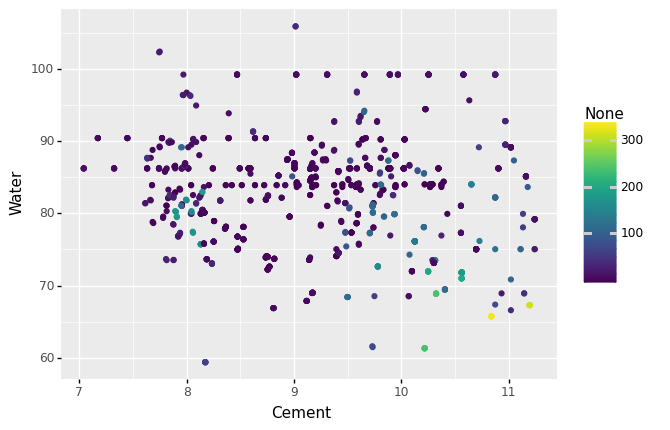

<ggplot: (-9223371897302264540)>

In [27]:
ggplot(dataOriginXTrans, aes(x='Cement', y='Water', color=dataMah)) + geom_point()

In [28]:
from sklearn.preprocessing import Normalizer

In [29]:
transformer = Normalizer()
transformer.fit(dataOriginXTrans)
Norm_dataOriginXTrans = pd.DataFrame(transformer.transform(dataOriginXTrans), columns=dataOriginXTrans.columns, index=dataOriginXTrans.index)

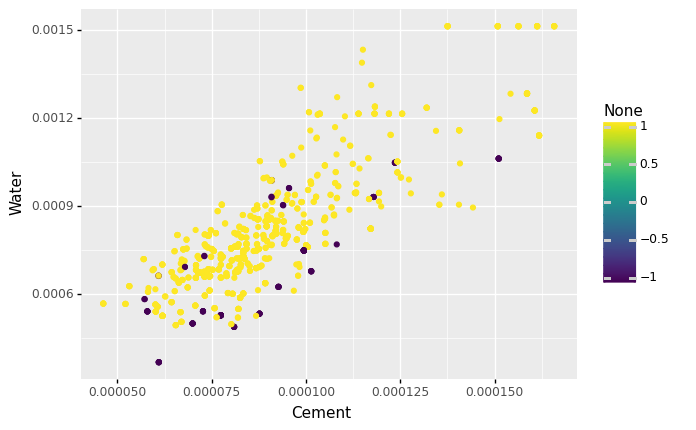

<ggplot: (-9223371897301961868)>

In [30]:
ggplot(Norm_dataOriginXTrans, aes(x='Cement', y='Water', color=dataPred)) + geom_point()

In [32]:
Norm_dataOriginXTrans.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\ccbce\Documents\MIIO\Analisis_predictivo\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Cement,Blast,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
Cement,1.00,0.26,-0.18,0.84,-0.05,0.84,-0.85,0.55
Blast,0.26,1.00,-0.12,0.41,0.18,0.26,-0.25,0.24
FlyAsh,-0.18,-0.12,1.00,-0.11,0.58,-0.07,0.11,-0.05
Water,0.84,0.41,-0.11,1.00,-0.22,0.82,-0.80,0.62
Superplasticizer,-0.05,0.18,0.58,-0.22,1.00,-0.10,0.10,-0.07
CoarseAggregate,0.84,0.26,-0.07,0.82,-0.10,1.00,-0.99,0.53
FineAggregate,-0.85,-0.25,0.11,-0.80,0.10,-0.99,1.00,-0.53
Age,0.55,0.24,-0.05,0.62,-0.07,0.53,-0.53,1.00


### Parte 2:  Modelos Lineales.
Evalue distintos modelos lineales (Ordinario, Ridge, Lasso, ElasticNets) para encontrar el mejor modelo predictivo para los datos.  Recuerde buscar los mejores parámetros de su modelo usando cross-validation. 

En el siguiente cuadro, describa los experimentos realizados, así como la decisión el modelo que escogió (solo escoja uno de ellos).  Incluya los códigos utilizados.

Adicionalemente, utilice el modelo escogido e interprételo. Determine cuáles son las variables mas relevantes para mejorar la fuerza compresiva del cemento.  Escriba sus conclusiones, así como los códigos utilizados para esto.

#### Respuesta 
< completar >

In [13]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(dataOriginXTrans,dataY,random_state=0)#Norm_dataOriginXTrans

In [14]:
# Escriba aca los códigos utilizados. Agregue celdas si necesita.
#Regresión Lineal Ordinaria
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(trainX,trainY)

LinearRegression()

In [16]:
lr.score(trainX,trainY)

0.7995267128599803

In [17]:
lr.score(testX,testY)

0.8247734168321578

In [27]:
from sklearn.model_selection import cross_validate

cvRes = pd.DataFrame()
#lr = LinearRegression()
scores = cross_validate(lr,trainX, trainY, cv=10)
out = pd.DataFrame({'cv':np.arange(10), 'scores': scores['test_score'], 'method': 'LR', 'param' : None})
cvRes = cvRes.append(out)

In [28]:
cvRes

,cv,scores,method,param
0,0,0.790948,LR,None
1,1,0.792553,LR,None
2,2,0.839655,LR,None
3,3,0.749510,LR,None
4,4,0.770681,LR,None
5,5,0.809342,LR,None
6,6,0.745610,LR,None
7,7,0.810177,LR,None
8,8,0.751165,LR,None
9,9,0.833397,LR,None


In [29]:
cvRes['scores'].mean()

0.7893037071412554

In [30]:
lr.predict([dataOriginXTrans.iloc[4]])

C:\Users\ccbce\Documents\MIIO\Analisis_predictivo\env\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


array([51.35076354])

In [31]:
dataY.describe()

count    1030.000000
mean       35.817836
std        16.705679
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        82.599225
Name: CompressiveStrength, dtype: float64

In [32]:
dataOriginXTrans.iloc[4]

Cement                   8.577659
Blast                    5.097964
FlyAsh                  -0.000000
Water                   86.222009
Superplasticizer         0.000000
CoarseAggregate       2112.340174
FineAggregate       119639.063188
Age                      5.919699
Name: 4, dtype: float64

In [33]:
dataOriginXTrans

,Cement,Blast,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,11.243143,0.000000,-0.000000,75.044457,1.484713,2263.041383,83030.504864,3.377358
1,11.243143,0.000000,-0.000000,75.044457,1.484713,2299.915741,83030.504864,3.377358
2,9.893632,5.177182,-0.000000,99.207368,0.000000,1999.627883,65552.405496,5.630006
3,9.893632,5.177182,-0.000000,99.207368,0.000000,1999.627883,65552.405496,5.933598
4,8.577659,5.097964,-0.000000,86.222009,0.000000,2112.340174,119639.063188,5.919699
...,...,...,...,...,...,...,...,...
1025,9.408238,4.955820,3.370067,81.645289,3.149981,1850.394875,104918.698706,3.377358
1026,9.809881,0.000000,3.499981,87.686276,3.413218,1725.605639,116452.118916,3.377358
1027,7.885577,5.153467,3.467506,86.478670,2.567107,1904.004263,107858.280459,3.377358
1028,8.046560,5.469462,-0.000000,80.156298,3.559113,2139.651484,110119.027382,3.377358


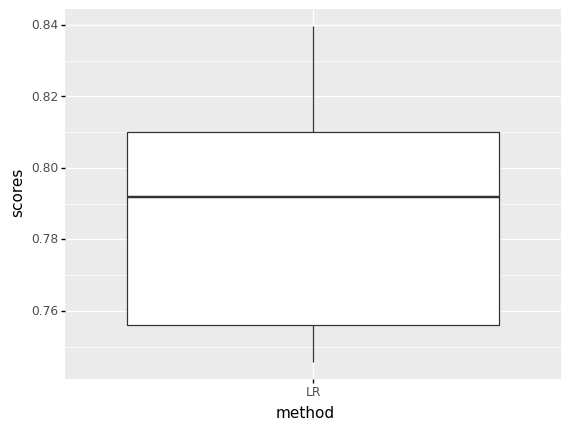

<ggplot: (-9223371890047501320)>

In [34]:
ggplot(cvRes,aes(x='method', y='scores')) + geom_boxplot() 

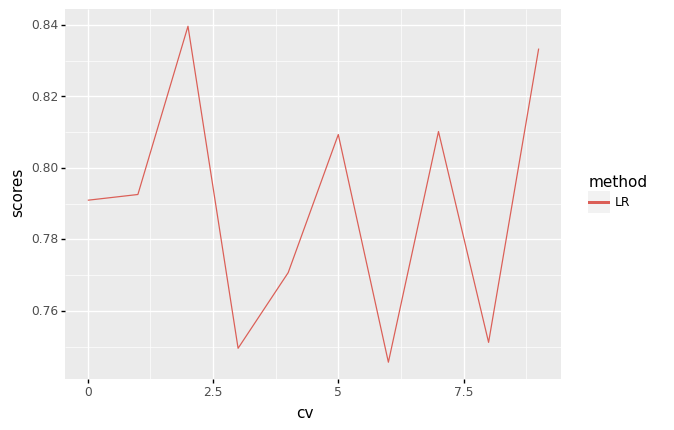

<ggplot: (-9223371890047489264)>

In [35]:
ggplot(cvRes,aes(color='method', y='scores', x='cv')) + geom_line()

In [36]:
from sklearn.linear_model import Ridge
lrRidge = Ridge()

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

In [39]:
lrRidge = Ridge()
clf = GridSearchCV(lrRidge, parameters, cv=10, scoring="r2")
clf.fit(trainX, trainY)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [40]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001301,4.606595e-04,0.000998,4.544298e-06,0.0001,{'alpha': 0.0001},0.790948,0.792553,0.839655,0.749510,0.770681,0.809342,0.745610,0.810177,0.751165,0.833397,0.789304,0.032594,5
1,0.001201,4.024130e-04,0.000899,2.997679e-04,0.001,{'alpha': 0.001},0.790948,0.792553,0.839654,0.749511,0.770681,0.809342,0.745611,0.810177,0.751165,0.833397,0.789304,0.032594,4
2,0.001199,4.004904e-04,0.000700,4.583181e-04,0.01,{'alpha': 0.01},0.790949,0.792551,0.839652,0.749514,0.770681,0.809341,0.745614,0.810175,0.751165,0.833397,0.789304,0.032593,3
3,0.001000,1.526624e-07,0.001000,1.507891e-07,0.1,{'alpha': 0.1},0.790961,0.792536,0.839633,0.749553,0.770683,0.809338,0.745642,0.810153,0.751159,0.833395,0.789305,0.032580,2
4,0.001100,2.999942e-04,0.000900,3.000340e-04,1,{'alpha': 1},0.791078,0.792384,0.839435,0.749935,0.770703,0.809298,0.745927,0.809937,0.751105,0.833378,0.789318,0.032451,1
5,0.001200,4.000428e-04,0.000300,4.584066e-04,10,{'alpha': 10},0.791923,0.790682,0.837280,0.753355,0.770682,0.808715,0.748494,0.807720,0.750423,0.833008,0.789228,0.031229,6
6,0.001000,1.980453e-07,0.001000,1.168008e-07,100,{'alpha': 100},0.783864,0.765328,0.808615,0.764640,0.759392,0.793445,0.757364,0.783424,0.736496,0.819063,0.777163,0.023985,7


In [41]:
clf.best_params_

{'alpha': 1}

In [42]:
from sklearn.linear_model import Lasso

In [53]:
n_alphas = 200
alphas = np.logspace(-2.5, 1, n_alphas)
r2 = []
res = pd.DataFrame()
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(trainX, trainY)
    r2 = lasso.score(testX, testY)
    out = pd.DataFrame({'alpha':a, 'coeff':lasso.coef_, 'vars' : trainX.columns, 'R2': r2 })
    res = res.append(out)


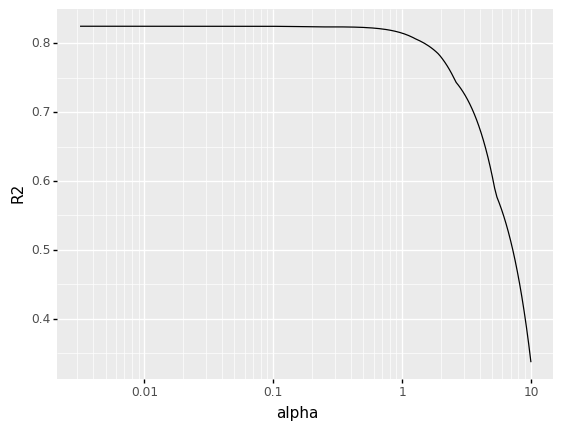

<ggplot: (-9223371890047094332)>

In [54]:
ggplot(res, aes(x='alpha', y='R2'))\
 + scale_x_log10()  + geom_line() 

In [59]:
lrLasso = Lasso(alpha=0.1)
lrLasso.fit(trainX, trainY)

Lasso(alpha=0.1)

In [60]:
lrLasso.score(testX, testY)

0.8246742121574491

In [61]:
np.sum(lrLasso.coef_ != 0)

8

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
lrENet = ElasticNet()
parameters = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], 
             'l1_ratio' : [0.2, 0.4, 0.6, 0.8, 1.0]}
clf = GridSearchCV(lrENet, parameters, cv=10)
clf.fit(trainX, trainY)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8, 1.0]})

In [64]:
clf.best_params_

{'alpha': 0.01, 'l1_ratio': 0.6}

In [65]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=4, n_repeats=25)

In [69]:
performance = pd.DataFrame()
cfl = LinearRegression()
scores = cross_validate(cfl, trainX, trainY, scoring=('r2','neg_mean_squared_error'), cv=rkf)
performance = performance.append(pd.DataFrame({'method': 'LR', 'cv':np.arange(100), 'R2': scores['test_r2'], 'MSE': scores['test_neg_mean_squared_error']}))
# cfl = PLSRegression(n_components=20)
# scores = cross_validate(cfl, dataX, dataY, scoring=('r2','neg_mean_squared_error'), cv=rkf)
# performance = performance.append(pd.DataFrame({'method': 'PLS', 'cv':np.arange(100), 'R2': scores['test_r2'], 'MSE': scores['test_neg_mean_squared_error']}))
cfl = Ridge(alpha=1)
scores = cross_validate(cfl, trainX, trainY, scoring=('r2','neg_mean_squared_error'), cv=rkf)
performance = performance.append(pd.DataFrame({'method': 'Ridge', 'cv':np.arange(100), 'R2': scores['test_r2'], 'MSE': scores['test_neg_mean_squared_error']}))
cfl = Lasso(alpha=0.1)
scores = cross_validate(cfl, dataOriginXTrans, dataY, scoring=('r2','neg_mean_squared_error'), cv=rkf)
performance = performance.append(pd.DataFrame({'method': 'Lasso', 'cv':np.arange(100), 'R2': scores['test_r2'], 'MSE': scores['test_neg_mean_squared_error']}))
cfl = ElasticNet(alpha=0.01, l1_ratio=0.6)
scores = cross_validate(cfl, dataOriginXTrans, dataY, scoring=('r2','neg_mean_squared_error'), cv=rkf)
performance = performance.append(pd.DataFrame({'method': 'ENet', 'cv':np.arange(100), 'R2': scores['test_r2'], 'MSE': scores['test_neg_mean_squared_error']}))

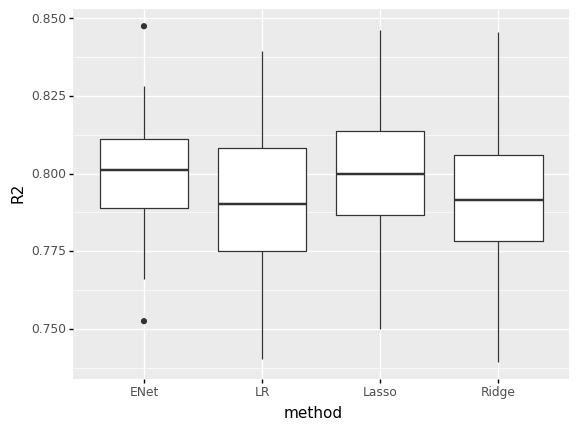

<ggplot: (-9223371890047239396)>

In [70]:
ggplot(performance, aes(x='method', y='R2')) + geom_boxplot()

In [72]:
cfl = Lasso(alpha=0.1)
scores = cross_validate(cfl, dataOriginXTrans, dataY, scoring=('r2','neg_mean_squared_error'), cv=rkf)
scores['test_r2'].mean()

0.7996071024035575

In [73]:
cfl = Ridge(alpha=1)
scores = cross_validate(cfl, trainX, trainY, scoring=('r2','neg_mean_squared_error'), cv=rkf)
scores['test_r2'].mean()

0.791604702343419

In [74]:
cfl = ElasticNet(alpha=0.01, l1_ratio=0.6)
scores = cross_validate(cfl, dataOriginXTrans, dataY, scoring=('r2','neg_mean_squared_error'), cv=rkf)
scores['test_r2'].mean()

0.7999933307256931

In [75]:
cfl = LinearRegression()
scores = cross_validate(cfl, trainX, trainY, scoring=('r2','neg_mean_squared_error'), cv=rkf)
scores['test_r2'].mean()

0.791166151834966

### Parte 3:  Modelos no-lineales.
Evalué distintos modelos no-lineales (KNN, Neural Networks, SVR) para encontrar el mejor modelo predictivo para los datos.  Recuerde buscar los mejores parámetros de su modelo usando cross-validation. 

En el siguiente cuadro, describa los experimentos realizados, así como la decisión el modelo que escogió (solo escoja uno de ellos).  Incluya los códigos utilizados.


#### Respuesta 
< completar >

In [70]:
# Escriba aca los códigos utilizados. Agregue celdas si necesita.


In [93]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()  
scaler.fit(dataOriginXTrans)  
trainXN = scaler.transform(trainX)  
testXN = scaler.transform(testX) 

In [94]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes = 5, max_iter=5000)#,  )#, early_stopping=True)
MLP.fit(trainXN, trainY)

C:\Users\ccbce\Documents\MIIO\Analisis_predictivo\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.


MLPRegressor(hidden_layer_sizes=5, max_iter=5000)

In [95]:
MLP.score(trainXN, trainY)

0.8307547849608032

In [96]:
MLP.score(testXN, testY)

0.8345511698920149

In [97]:
from sklearn.model_selection import GridSearchCV
MLP = MLPRegressor( max_iter=5000)
parameters = {'alpha': [1e-2, 1e-1, 1, 10, 100], 
             'hidden_layer_sizes' : np.arange(3,20)}
clf = GridSearchCV(MLP, parameters)
clf.fit(trainXN, trainY)

C:\Users\ccbce\Documents\MIIO\Analisis_predictivo\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
C:\Users\ccbce\Documents\MIIO\Analisis_predictivo\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
C:\Users\ccbce\Documents\MIIO\Analisis_predictivo\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
C:\Users\ccbce\Documents\MIIO\Analisis_predictivo\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
C:\Users\ccbce\Docum

GridSearchCV(estimator=MLPRegressor(max_iter=5000),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'hidden_layer_sizes': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [83]:
clf.best_params_

{'alpha': 1, 'hidden_layer_sizes': 18}

In [85]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(trainXN, trainY)

KNeighborsRegressor()

In [86]:
knn.score(testXN, testY)

0.37468585711197233

In [ ]:
maxN = 20
scores = []
for nneigh in range(2,maxN):
    knn = KNeighborsRegressor(n_neighbors=nneigh)
    knn.fit(trainXN, trainY)
    scores.append(knn.score(testXN, testY))

In [ ]:
pd.DataFrame(scores, index=range(2,maxN)).plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
parameters = {'n_neighbors': [2,3,4,5,6,7,8], 
             'p' : np.arange(1,4,0.5)}
clf = GridSearchCV(knn, parameters, cv=10)
clf.fit(trainXN, trainY)

In [ ]:
clf.best_params_

### Parte 4:  Construyendo un mejor  cemento

El dataset contiene mezclas donde los valores de `CompressiveStrength` llegan a 81~82 MPa.   

Utilize lo observado de ambos modelos para proponer una nueva mezcla que tenga un mayor `CompressiveStrength` que lo visto en los datos. Preocupese que la suma de estos ingredientes (primeras 7 campos) no exceda los 2400 kg.  Valide su mezcla con ambos modelos (el modelo lineal y el no-lineal) usando la función `.predict()` que le permite predecir el valor para un nuevo dato.

Escriba a continuación su mezcla elegida. Justifique su respuesta.  Incluya también los códigos utilizados para generarla.




#### Respuesta:
< escriba aca las decisiones y el por qué de ellas >

In [69]:
# Escriba aca los códigos utilizados. Agregue celdas si necesita.

